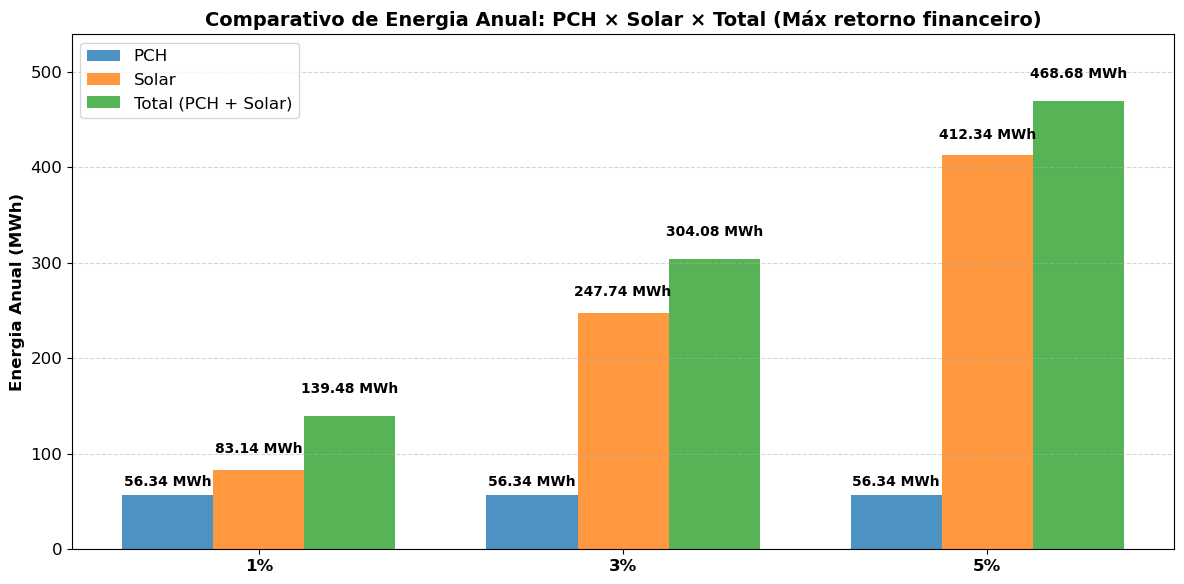

Gráfico salvo em: Gráficos/Comparativo_PCH_Solar_Total_Máx_retorno_financeiro.png


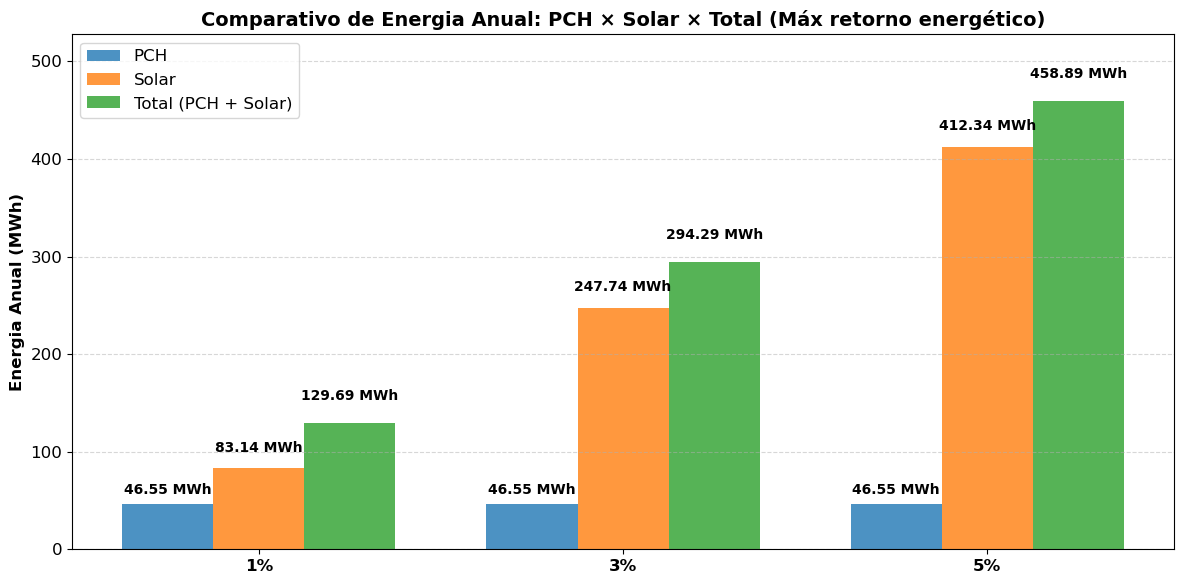

Gráfico salvo em: Gráficos/Comparativo_PCH_Solar_Total_Máx_retorno_energético.png


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

# ===============================
# CRIAR PASTA "Gráficos"
# ===============================
os.makedirs("Gráficos", exist_ok=True)

# ===============================
# DADOS
# ===============================
pch_dict = {
    "Máx retorno financeiro": 56.34,  # MWh/ano
    "Máx retorno energético": 46.55   # MWh/ano
}

solar = {
    "1%": 83.14,
    "3%": 247.74,
    "5%": 412.34
}

cenarios = list(solar.keys())
energia_solar = np.array(list(solar.values()))

# ===============================
# FUNÇÃO PARA GERAR GRÁFICOS
# ===============================
def gerar_grafico(pch_val, titulo_suffix):
    energia_pch = np.array([pch_val] * len(cenarios))
    energia_total = energia_pch + energia_solar

    x = np.arange(len(cenarios))
    largura = 0.25

    plt.figure(figsize=(12, 6))

    barras_pch   = plt.bar(x - largura, energia_pch, width=largura, label="PCH", alpha=0.8)
    barras_solar = plt.bar(x, energia_solar, width=largura, label="Solar", alpha=0.8)
    barras_total = plt.bar(x + largura, energia_total, width=largura, label="Total (PCH + Solar)", alpha=0.8)

    plt.xticks(x, cenarios, fontsize=12, fontweight='bold')
    plt.ylabel("Energia Anual (MWh)", fontsize=12, fontweight='bold')
    plt.title(f"Comparativo de Energia Anual: PCH × Solar × Total ({titulo_suffix})", fontsize=14, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)

    # Ajustar limite do eixo Y para caber todos os rótulos
    max_val = max(energia_total)
    plt.ylim(0, max_val * 1.15)  # adiciona 15% de espaço extra no topo

    # Rótulos ajustados
    def rotular(barras, desloc=0.02):
        for b in barras:
            altura = b.get_height()
            plt.text(
                b.get_x() + b.get_width()/2,
                altura + max_val*desloc,
                f"{altura:.2f} MWh",
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold'
            )

    rotular(barras_pch, desloc=0.015)
    rotular(barras_solar, desloc=0.03)
    rotular(barras_total, desloc=0.045)

    plt.tight_layout()

    # Salvar gráfico
    nome_arquivo = f"Gráficos/Comparativo_PCH_Solar_Total_{titulo_suffix.replace(' ', '_')}.png"
    plt.savefig(nome_arquivo, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Gráfico salvo em: {nome_arquivo}")


# ===============================
# GERAR GRÁFICOS PARA TODOS OS PCH
# ===============================
for descricao, valor in pch_dict.items():
    gerar_grafico(valor, descricao)
